<a href="https://colab.research.google.com/github/hangtantai/MNT-project/blob/dev-tuan/Titanic_Simple_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Titanic Simple Project*

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Import Library

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import string as str
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
!pip install joypy # Install the joypy library
import matplotlib.pyplot as plt
import seaborn as sns
import joypy # Import the library after installation
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Machine_Learning/Simple_Project/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Machine_Learning/Simple_Project/test.csv")



In [ ]:
# Features of Data Set -> List
features = df_train.columns.tolist()
print("Features of Titanic Data Set:\n" + "\n".join(features))
features = features[1:]

Features of Titanic Data Set:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


* Variable Notes:
1. pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
2. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
3. sibsp: The dataset defines family relations in this way...
4. Sibling = brother, sister, stepbrother, stepsister
5. Spouse = husband, wife (mistresses and fiancés were ignored)
6. parch: The dataset defines family relations in this way...
7. Parent = mother, father
8. Child = daughter, son, stepdaughter, stepson
9. Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
# Show 5 rows
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_copy= df_train.set_index('PassengerId')
df_copy.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Show Infomation of Data set
df_copy.info()
df_copy.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
def show_missing_values(df,features):
  n_rows = df.shape[0]
  for i in features:
    counts = df[i].isnull().sum()
    if counts > 0:
      print(f"The feature {i} is missing {counts} values, equivalent {(counts/n_rows)*100} %")

show_missing_values(df_copy,features)


The feature Age is missing 177 values, equivalent 19.865319865319865 %
The feature Cabin is missing 687 values, equivalent 77.10437710437711 %
The feature Embarked is missing 2 values, equivalent 0.22446689113355783 %


- Age vaf Carbin missing values khá nhiều|

In [ ]:
# Show more info of category features
features_ct = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
  for f in features:
    df[f] = df[f].astype('category')
  return df

convert_cat(df_copy,features_ct)
df_copy.describe(include=["category"])


,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


-  *Ở bước này ta có thể thấy sơ bộ về thông tin của các features và các thông số thống số thống kê của các numerical và categorical*

## Exploratory Data Analysis




### For Categorical

In [ ]:
def counts_value(df, features_ct,normalize= False):
    result_df = pd.DataFrame()
    for f in features_ct:
        counts = df[f].value_counts(normalize=normalize)
        result_df = pd.concat([result_df, counts], axis=1)
    result_df.columns = features_ct
    print(result_df)

counts_value(df_copy, features_ct)
print("\n Percentage")
counts_value(df_copy, features_ct,normalize =True) # Khi normalize = True thì thể hiện phần trăm


        Survived  Pclass    Sex  SibSp  Parch  Embarked
0          549.0     NaN    NaN  608.0  678.0       NaN
1          342.0   216.0    NaN  209.0  118.0       NaN
3            NaN   491.0    NaN   16.0    5.0       NaN
2            NaN   184.0    NaN   28.0   80.0       NaN
male         NaN     NaN  577.0    NaN    NaN       NaN
female       NaN     NaN  314.0    NaN    NaN       NaN
4            NaN     NaN    NaN   18.0    4.0       NaN
8            NaN     NaN    NaN    7.0    NaN       NaN
5            NaN     NaN    NaN    5.0    5.0       NaN
6            NaN     NaN    NaN    NaN    1.0       NaN
S            NaN     NaN    NaN    NaN    NaN     644.0
C            NaN     NaN    NaN    NaN    NaN     168.0
Q            NaN     NaN    NaN    NaN    NaN      77.0

 Percentage
        Survived    Pclass       Sex     SibSp     Parch  Embarked
0       0.616162       NaN       NaN  0.682379  0.760943       NaN
1       0.383838  0.242424       NaN  0.234568  0.132435       NaN
3 

- Dữ liệu không quá mất cân bằng
- Tỉ lệ người đi một mình rất cao
- Tỉ lệ người đi từ cảng  Southampton cao hơn hai nhóm còn lại

In [ ]:
cols = features_ct[1::]
cols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

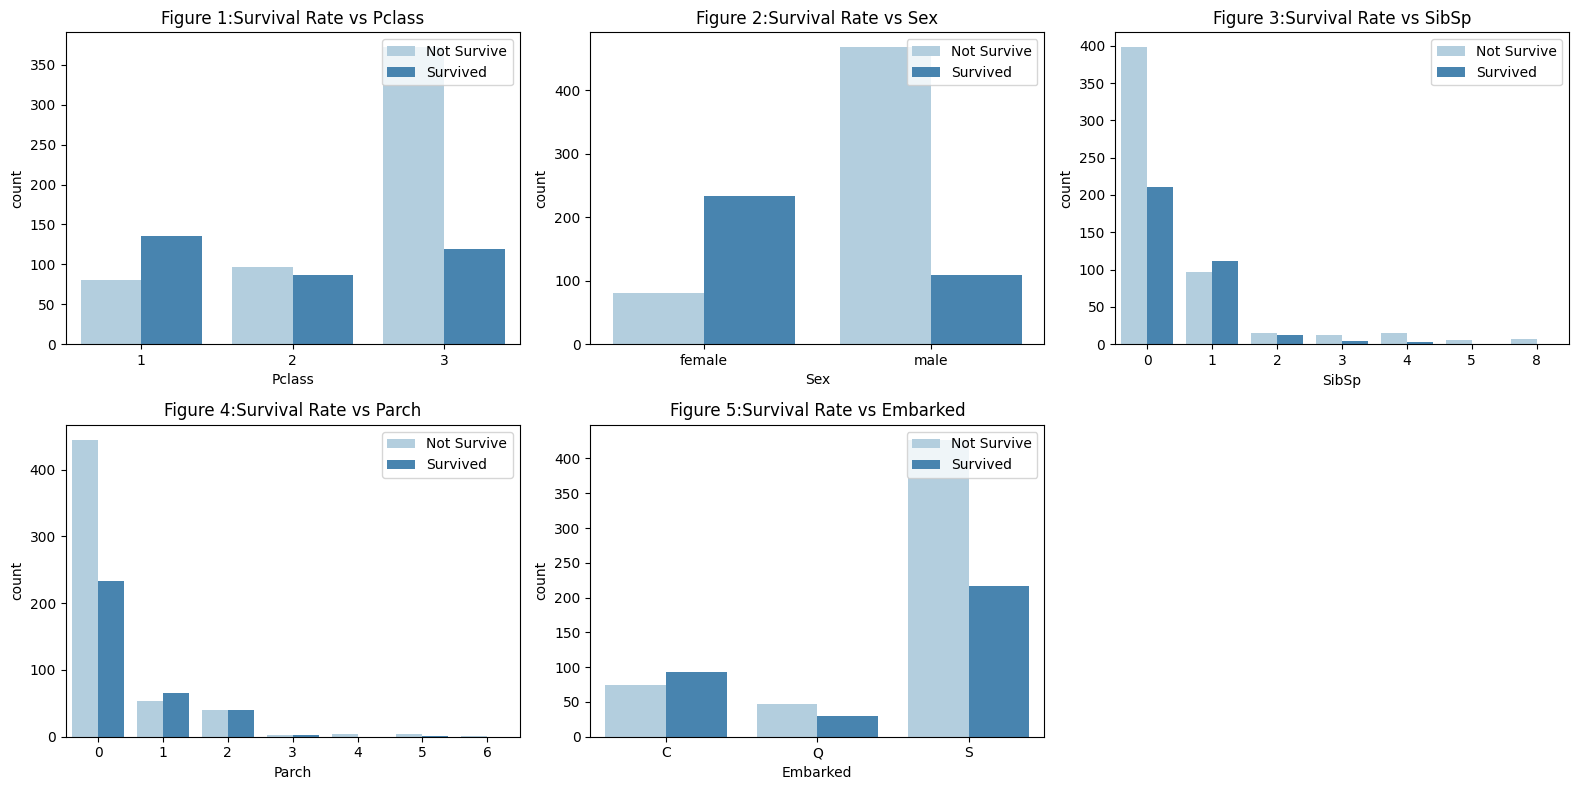

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = features_ct[1::]
n_rows = 2
n_cols = 3
fig,ax =plt.subplots(n_rows,n_cols, figsize=(16,8))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c # index to loop through list through
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=df_copy,x=cols[i],hue='Survived',palette="Blues",ax=ax_i)
            ax_i.set_title(f"Figure {i+1}:Survival Rate vs {cols[i]}")
            ax_i.legend(title='',loc='upper right',labels=['Not Survive','Survived'])
plt.tight_layout()
ax.flat[-1].set_visible(False) # Remove the last subplot
plt.show()

- Tỉ lệ sống sót của female cao hơn male
- Đa phần hành khách không đi chung với (ba mẹ, anh chị em) và cũng có tỉ lệ tử vong cao hơn với nhóm còn lại
- Ta có thể thấy SibSP, và Parach có phần phối tương tự như nhau -> Đề xuất gom lại thành **Family**


### For Numerical
- Age
- Fare

 - ## Age

/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


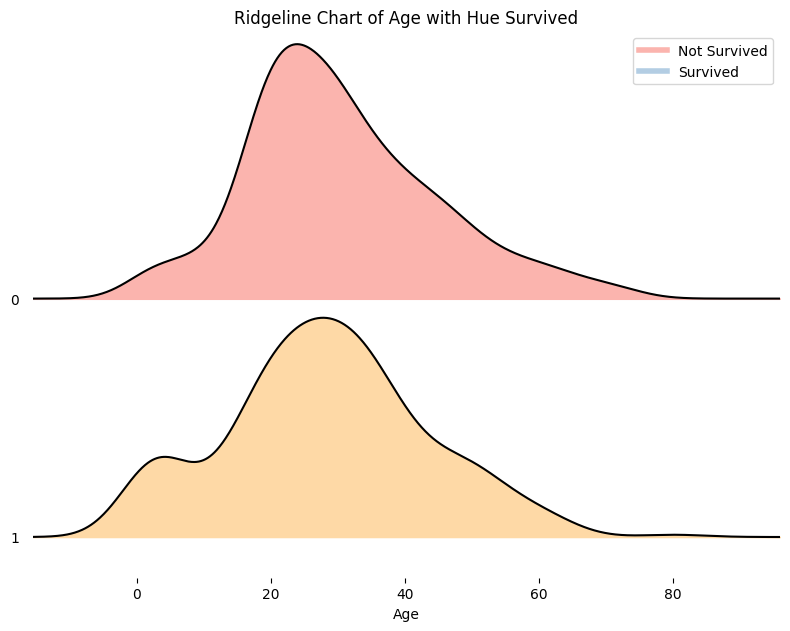

In [ ]:

from matplotlib import cm
df_age_survived = df_copy[['Age', 'Survived']]
fig, ax = joypy.joyplot(df_age_survived, by="Survived", column="Age",figsize=(8,6),colormap = cm.Pastel1);
plt.title('Ridgeline Chart of Age with Hue Survived');
plt.xlabel('Age');
handles = [plt.Line2D([0], [0], color=cm.Pastel1(0), lw=4),
           plt.Line2D([0], [0], color=cm.Pastel1(1), lw=4)]
labels = ['Not Survived', 'Survived']
plt.legend(handles, labels)
plt.ylabel('Density');
plt.show();

- **Fare**

/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


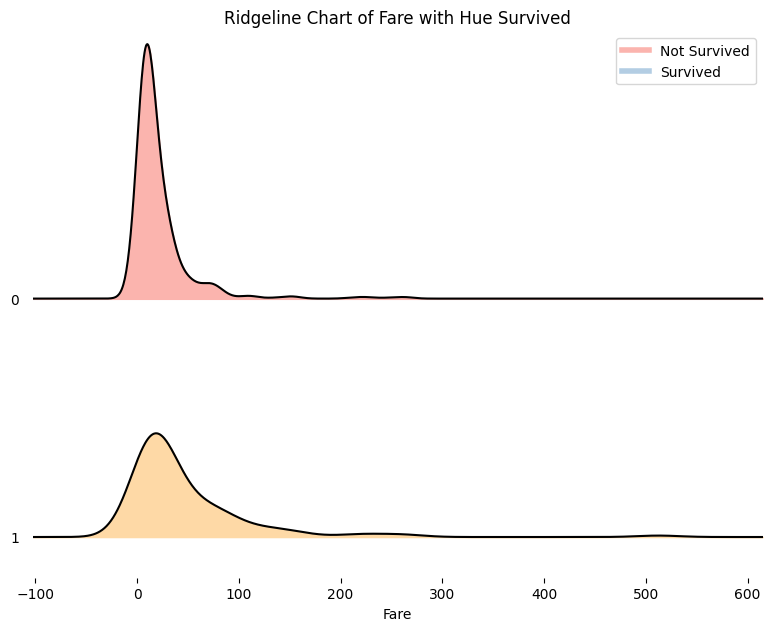

In [ ]:
df_age_Fare = df_copy[['Fare', 'Survived']]
fig, ax = joypy.joyplot(df_age_Fare, by="Survived", column="Fare",figsize=(8,6),colormap = cm.Pastel1);
plt.title('Ridgeline Chart of Fare with Hue Survived');
plt.xlabel('Fare');
handles = [plt.Line2D([0], [0], color=cm.Pastel1(0), lw=4),
           plt.Line2D([0], [0], color=cm.Pastel1(1), lw=4)]
labels = ['Not Survived', 'Survived']
plt.legend(handles, labels)
plt.ylabel('Density');
plt.show();

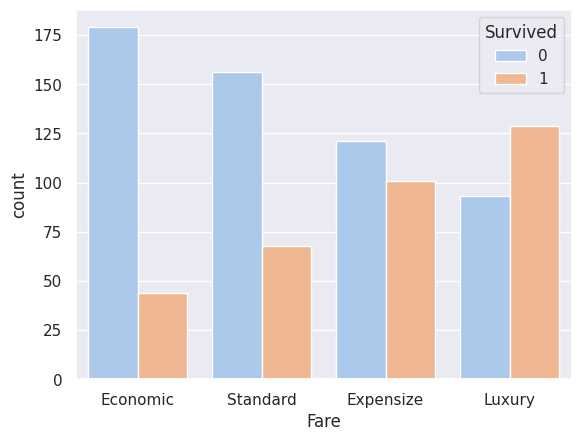

In [ ]:
# Gom lại theo nhóm tiền
sns.set_theme(context='notebook', style='darkgrid', palette='pastel')
fare_categories =['Economic','Standard','Expensize','Luxury']
quartile_data = pd.qcut(df_copy['Fare'],4, labels=fare_categories) # Sử dụng như trong Data Mining
sns.countplot(x=quartile_data, hue=df_copy['Survived']);


- Tỉ lệ sống sót vào hạng vé tỉ lệ thuận với hạng vé

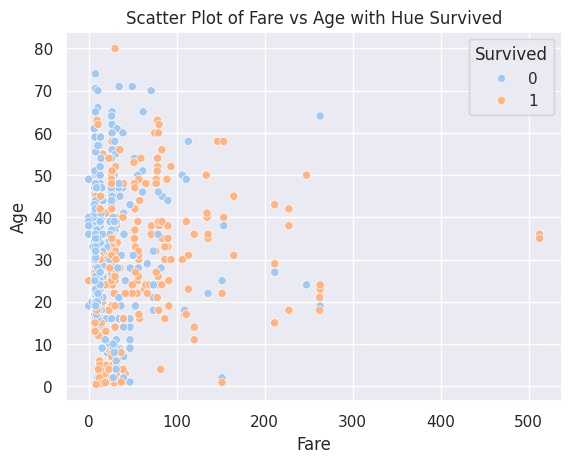

In [ ]:
# Scatter plot
sns.scatterplot(x='Fare',y='Age',hue='Survived',data=df_copy)
plt.title('Scatter Plot of Fare vs Age with Hue Survived')
plt.show()

  - *Ta chart này này ta cũng có thể thấy rằng phân khúc từ trẻ tới trung niên được thường mua vé giá cao hơn và  nhòm mua vé cao này tỉ lệ sống sót cũng cao hơn*
  - *Tuy nhiên nhóm trẻ em sẽ được ưu tiên cứu hộ hơn nên tỉ lệ sống sót cũng cao hơn mặc dù giá vé*


## Feature Engineering and Data Wrapping
1. Create feature Family :
  -  Sipsp
  - Parch
2. Name
3. Fill N/A Age

## Name


In [ ]:
df_copy['Name'].head()

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"


In [ ]:
import re
def get_title(name):
    p=re.compile(r",([\w\s]+)\.")
    return p.search(name).group(1).strip()
df_copy['Title'] = df_copy['Name'].apply(lambda name: get_title(name))
df_copy['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [ ]:
df_test['Title'] = df_test['Name'].apply(lambda name: get_title(name))
df_test['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [ ]:
def group_title(name):
  if name in ['Mr','Miss','Mrs','Master']:
    return name
  elif name =="Ms":
    return "Miss"
  else:
    return "Other"
df_copy['Title'] = df_copy['Title'].apply(lambda name: group_title(name))
df_copy['Title'].value_counts()
df_test['Title'] = df_test['Title'].apply(lambda name: group_title(name)) # apply for data test


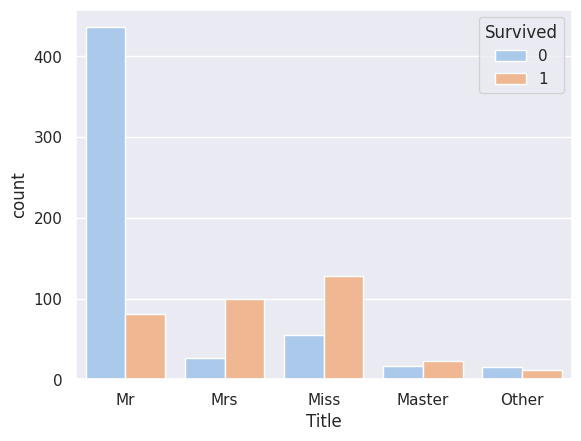

In [ ]:
sns.countplot(x='Title',hue='Survived',data=df_copy);


### Family Size

In [ ]:

df_copy['SibSp'] = pd.to_numeric(df_copy['SibSp'])
df_copy['Parch'] = pd.to_numeric(df_copy['Parch'])
df_copy['FamilyCat'] = df_copy['SibSp'] + df_copy['Parch'] + 1

df_test['SibSp'] = pd.to_numeric(df_test['SibSp'])
df_test['Parch'] = pd.to_numeric(df_test['Parch'])
df_test['FamilyCat'] = df_test['SibSp'] + df_test['Parch'] + 1

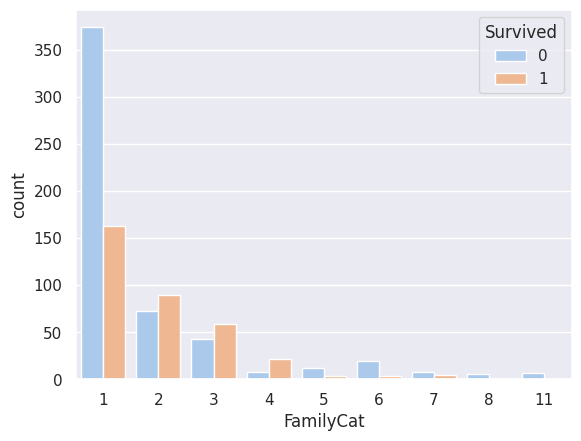

In [ ]:
sns.countplot(x='FamilyCat',hue='Survived',data=df_copy);

In [ ]:
def group_family_size(family_size):
  if family_size == 1:
    return "Single"
  elif family_size <= 4:
    return "Small"
  elif family_size <=6:
    return "Medium"
  else:
    return "Large"

df_copy['FamilyCat'] = df_copy['FamilyCat'].apply(lambda size: group_family_size(size))
df_test['FamilyCat'] = df_test['FamilyCat'].apply(lambda size: group_family_size(size))


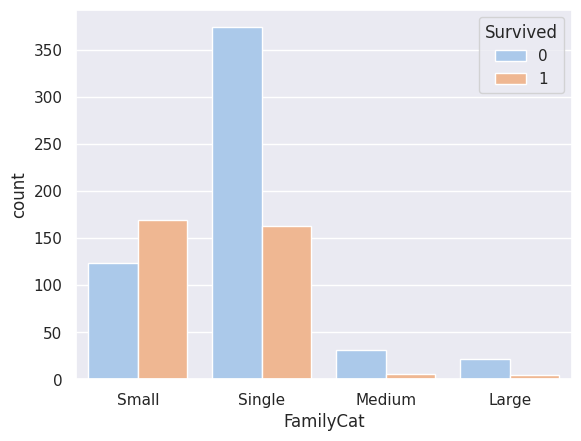

In [ ]:
sns.countplot(x='FamilyCat',hue='Survived',data=df_copy);

## Data Wrapping

- Age

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    category
 1   Pclass     891 non-null    category
 2   Name       891 non-null    object  
 3   Sex        891 non-null    category
 4   Age        714 non-null    float64 
 5   SibSp      891 non-null    int64   
 6   Parch      891 non-null    int64   
 7   Ticket     891 non-null    object  
 8   Fare       891 non-null    float64 
 9   Cabin      204 non-null    object  
 10  Embarked   889 non-null    category
 11  Title      891 non-null    object  
 12  FamilyCat  891 non-null    object  
dtypes: category(4), float64(2), int64(2), object(5)
memory usage: 73.6+ KB


In [ ]:
num_features =['Age','Fare']
cat_features =['Pclass','Sex','Embarked','Title','FamilyCat']
features = num_features + cat_features
print("Data Train")
show_missing_values(df_copy,features)
print("Data Test")
show_missing_values(df_test,features)

Data Train
The feature Age is missing 177 values, equivalent 19.865319865319865 %
The feature Embarked is missing 2 values, equivalent 0.22446689113355783 %
Data Test
The feature Age is missing 86 values, equivalent 20.574162679425836 %
The feature Fare is missing 1 values, equivalent 0.23923444976076555 %


In [ ]:
df_copy['Age']= df_copy.groupby(['Title','Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))
df_test['Age']= df_test.groupby(['Title','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))


<ipython-input-41-4def5227803d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy['Age']= df_copy.groupby(['Title','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))


-